
## Hierarchical indexing

In [1]:
import pandas as pd
import numpy as np
print( np.arange(6))
print (np.arange(6).reshape(2,3))
data=pd.DataFrame(((np.arange(6)+1)*100).reshape(3,2),
                    index=pd.Index(['Jan', 'Feb', 'Mar'],name='Month'),
                  columns=pd.Index(['Mad', 'Bcn'], name='Ciudad'))

[0 1 2 3 4 5]
[[0 1 2]
 [3 4 5]]


In [127]:
data

Ciudad,Mad,Bcn
Month,,
Jan,100,200
Feb,300,400
Mar,500,600


Populating the interactive namespace from numpy and matplotlib
Ciudad  Mad  Bcn
Month           
Jan     100  200
Feb     300  400
Mar     500  600


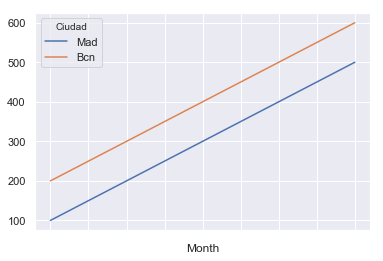

In [129]:
%pylab inline
print (data)
_=data.plot(grid=True)


In [130]:
_=data.pivot().plot(grid=True)

ValueError: cannot label index with a null key

In [131]:
data.unstack()

Ciudad  Month
Mad     Jan      100
        Feb      300
        Mar      500
Bcn     Jan      200
        Feb      400
        Mar      600
dtype: int64

In [132]:
data.stack()

Month  Ciudad
Jan    Mad       100
       Bcn       200
Feb    Mad       300
       Bcn       400
Mar    Mad       500
       Bcn       600
dtype: int64

In [133]:
#pivot
long_data_list=[['2015-01-01', 'One',372],
               ['2015-01-02', 'One',373],
               ['2015-01-03', 'One',377],
['2015-01-01', 'Two',34],
['2015-01-02', 'Two',74]]
data=pd.DataFrame(long_data_list,
                  columns=pd.Index(['Date', 'Item', 'Value']))

In [134]:
data

,Date,Item,Value
0,2015-01-01,One,372
1,2015-01-02,One,373
2,2015-01-03,One,377
3,2015-01-01,Two,34
4,2015-01-02,Two,74


In [135]:
data.pivot('Date', 'Item', 'Value')

Item,One,Two
Date,,
2015-01-01,372.0,34.0
2015-01-02,373.0,74.0
2015-01-03,377.0,NaN


In [136]:
#pivot
#pivot is just a shortcut for creating a hierarchical index using set_index and reshaping with unstack
long_data_list= [['2015-01-01', 'One',372, 'Igor'],
                ['2015-01-02', 'One',373, 'Marcos'],
                ['2015-01-03', 'One',377, 'Igor'],
                ['2015-01-01', 'Two',34, 'Julia'],
                ['2015-01-02', 'Two',74, 'Julia']]
data=pd.DataFrame(long_data_list,
                  columns=pd.Index(['Date', 'Item', 'Value', 'Responsable']))

In [137]:
data

,Date,Item,Value,Responsable
0,2015-01-01,One,372,Igor
1,2015-01-02,One,373,Marcos
2,2015-01-03,One,377,Igor
3,2015-01-01,Two,34,Julia
4,2015-01-02,Two,74,Julia


In [138]:
data.pivot('Date', 'Item', 'Value')

Item,One,Two
Date,,
2015-01-01,372.0,34.0
2015-01-02,373.0,74.0
2015-01-03,377.0,NaN


In [71]:
data.pivot('Date', 'Item')

Value     Responsable       
Item         One Two         One    Two
Date                                   
2015-01-01   372  34        Igor  Julia
2015-01-02   373  74      Marcos  Julia
2015-01-03   377 NaN        Igor    NaN

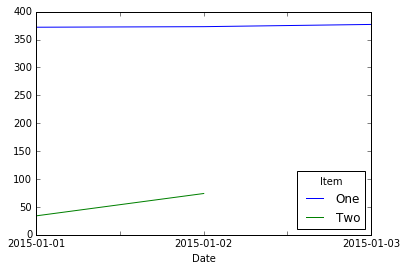

In [65]:
data.pivot('Date', 'Item', 'Value').plot()

In [96]:
b=data.set_index(['Date', 'Item'])
b

,,Value,Responsable
Date,Item,,
2015-01-01,One,372,Igor
2015-01-02,One,373,Marcos
2015-01-03,One,377,Igor
2015-01-01,Two,34,Julia
2015-01-02,Two,74,Julia


In [100]:
b.ix['2015-01-01','One']

Value           372
Responsable    Igor
Name: (2015-01-01, One), dtype: object

In [103]:
c=data.set_index(['Date', 'Item']).unstack('Item')
c

Value     Responsable       
Item         One Two         One    Two
Date                                   
2015-01-01   372  34        Igor  Julia
2015-01-02   373  74      Marcos  Julia
2015-01-03   377 NaN        Igor    NaN

In [94]:
data.groupby(['Date','Item']).unstack('Item')

AttributeError: Cannot access callable attribute 'unstack' of 'DataFrameGroupBy' objects, try using the 'apply' method

In [88]:
data.groupby(['Date']).count().reset_index()

,Date,Item,Value,Responsable
0,2015-01-01,2,2,2
1,2015-01-02,2,2,2
2,2015-01-03,1,1,1
